# importing the modules


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import numpy.random as rd
import seaborn as sns

# datapath

In [8]:
data="C:\\Users\\V Abhiram\\Downloads\\Rice_classification\\Rice_Image_Dataset"

# defining the image

In [9]:
batch_size=100
img_height=250
img_width=250

# loading the data

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 75000 files belonging to 5 classes.


# printing class names

In [60]:
class_names = dataset.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


# displaying random images

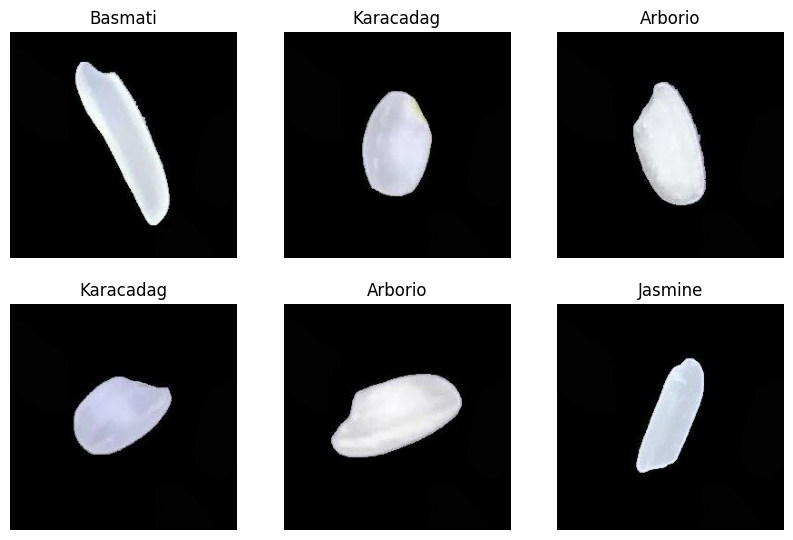

In [54]:
for images, labels in dataset.take(1):
    # Convert to numpy array for easy indexing
    images_np = images.numpy()
    labels_np = labels.numpy()
        
        # Randomly select image indices
    random_indices = np.random.choice(images_np.shape[0], 6, replace=False)
        
        # Plot the images
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(random_indices):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images_np[idx].astype("uint8"))
        plt.title(class_names[labels_np[idx]])
        plt.axis("off")
plt.show()

# creating a validation dataset

In [13]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


# building a neural model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, (7, 7), activation='relu'),
    tf.keras.layers.AveragePooling2D((4, 4)),
    tf.keras.layers.Conv2D(64, (7, 7), activation='relu'),
    tf.keras.layers.AveragePooling2D((4, 4)),
    tf.keras.layers.Conv2D(128, (7, 7), activation='relu'),
    tf.keras.layers.AveragePooling2D((4, 4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

C:\Users\V Abhiram\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# synthesising the model

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# training the model

In [16]:
epochs = 5
history = model.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2200s 3s/step - accuracy: 0.8693 - loss: 0.3199 - val_accuracy: 0.9665 - val_loss: 0.0992
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2174s 3s/step - accuracy: 0.9646 - loss: 0.0995 - val_accuracy: 0.9684 - val_loss: 0.0928
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2121s 3s/step - accuracy: 0.9745 - loss: 0.0723 - val_accuracy: 0.9837 - val_loss: 0.0479
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2028s 3s/step - accuracy: 0.9821 - loss: 0.0537 - val_accuracy: 0.9867 - val_loss: 0.0427
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2076s 3s/step - accuracy: 0.9870 - loss: 0.0399 - val_accuracy: 0.9885 - val_loss: 0.0380


# calculating the accuracy and loss

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

# plotting the curve for the accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

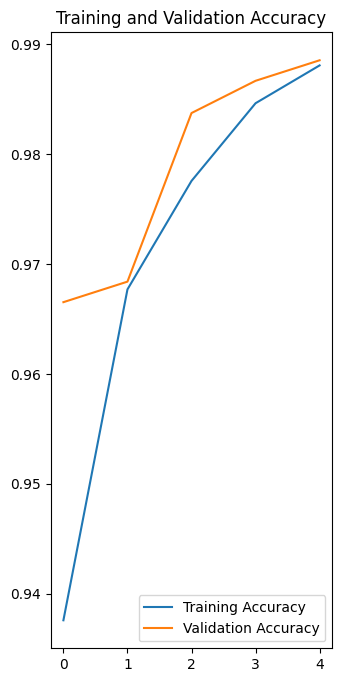

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plotting the curve for the loss

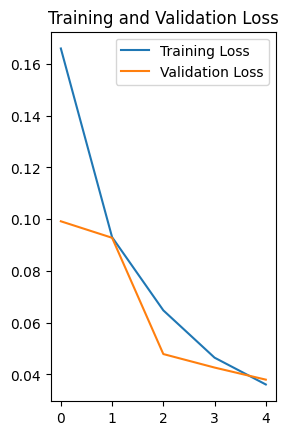

In [19]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# storing the model in a specific path

In [22]:
model.save('rice_classification_five_variety.keras')

# testing the image

In [67]:
from tensorflow.keras.preprocessing import image
sample_image_path ="C:\\Users\\V Abhiram\\Downloads\\Rice_classification\\Rice_Image_Dataset\\Arborio\\Arborio (992).jpg"
img = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
img_array = img_array   # Rescaling

# making prediction

In [68]:
loaded_model = tf.keras.models.load_model('rice_classification_five_variety.keras')
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


# final plot

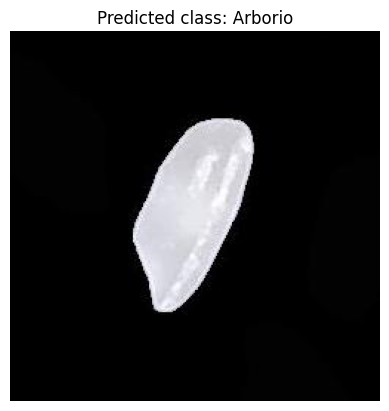

In [69]:
plt.imshow(image.load_img(sample_image_path))
plt.title(f'Predicted class: {class_names[predicted_class[0]]}')
plt.axis('off')
plt.show()